In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic_ok.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage,Miss
1304,3,0,"Zabour, Miss. Thamine",1,22.0000,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss
1305,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult,Mr
1306,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult,Mr


# 데이터 x와 정답 y

In [4]:
# X
# [선실등급, 성별, 나이, 부부형제_수, 부모자식_수, 운임]
x_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = df[x_cols].values
X

array([[  1.    ,   1.    ,  29.    ,   0.    ,   0.    , 211.3375],
       [  1.    ,   0.    ,   0.9167,   1.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,   2.    ,   1.    ,   2.    , 151.55  ],
       ...,
       [  3.    ,   0.    ,  26.5   ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  27.    ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  29.    ,   0.    ,   0.    ,   7.875 ]])

In [5]:
# y
y = df['survived'].values
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

---
## 여기까지 데이터 전처리
---
# ML 코딩 5단계

## 1. 훈련 데이터와 테스트 데이터 준비

### ! 주의 : overfitting, underfitting 주의 / overfit 보완 -> hyper parameter 튜닝

## 2. 머신러닝 알고리즘 선택


## 3. 훈련 : fit

## 4. 평가 : score

## 5. 새 데이터로 예측 : predict

In [6]:
from sklearn.model_selection import train_test_split # scikit(과학도구) : 머신러닝 구사 / numpy -> scipy -> scikit-learn

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7) # 10%를 test로, random_state으로 랜덤한 값 고정
X_train

array([[ 1.    ,  0.    , 39.    ,  0.    ,  0.    , 29.7   ],
       [ 1.    ,  0.    , 27.    ,  0.    ,  0.    , 76.7292],
       [ 3.    ,  1.    , 22.    ,  1.    ,  0.    , 24.15  ],
       ...,
       [ 2.    ,  0.    , 34.    ,  0.    ,  0.    , 13.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  8.05  ],
       [ 1.    ,  0.    , 41.    ,  1.    ,  0.    , 51.8625]])

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier(max_depth=6) # 설명가능한 AI에 가까움, hyperparameter tuning

In [10]:
tree.fit(X_train, y_train) # 훈련

DecisionTreeClassifier(max_depth=6)

In [11]:
print('훈련 점수:', tree.score(X_train, y_train))

훈련 점수: 0.8394222599830077


In [12]:
print('테스트 점수:', tree.score(X_test, y_test))

테스트 점수: 0.8320610687022901


In [13]:
# 디카프리오는 살 수 있었나?
# [[3등실, 남:0, 19살, 형제:0, 부모:0, 운임:10달러]]
dicaprio = [[3,0,19,0,0,10]]
result = tree.predict(dicaprio)
print("결과 : ", result)
pct = tree.predict_proba(dicaprio) 
print("확률 : ", pct) # [[0.88944724 0.11055276]] : [[사망확률 생존확률]]
print(f"생존확률:{pct[0][1]*100:.2f}%")

결과 :  [0]
확률 :  [[0.88944724 0.11055276]]
생존확률:11.06%


In [14]:
# 윈슬릿은?
# [[1등실, 여:1, 17살, 형제:1, 부모:2, 운임:100달러]]
winslet = [[1,1,17,1,2,100]]
result = tree.predict(winslet)
if result == 0:
    print("결과 : 사망")
elif result == 1:
    print("결과 : 생존")
pct = tree.predict_proba(winslet) 
print("확률 : ", pct) # [[0.88944724 0.11055276]] : [[사망확률 생존확률]]
print(f"생존확률:{pct[0][1]*100:.2f}%") # 생존확률 99.21%

결과 : 생존
확률 :  [[0.00787402 0.99212598]]
생존확률:99.21%


In [15]:
# 설명가능한 인공지능 : XAI

In [16]:
from sklearn.tree import plot_tree

<function matplotlib.pyplot.show(close=None, block=None)>

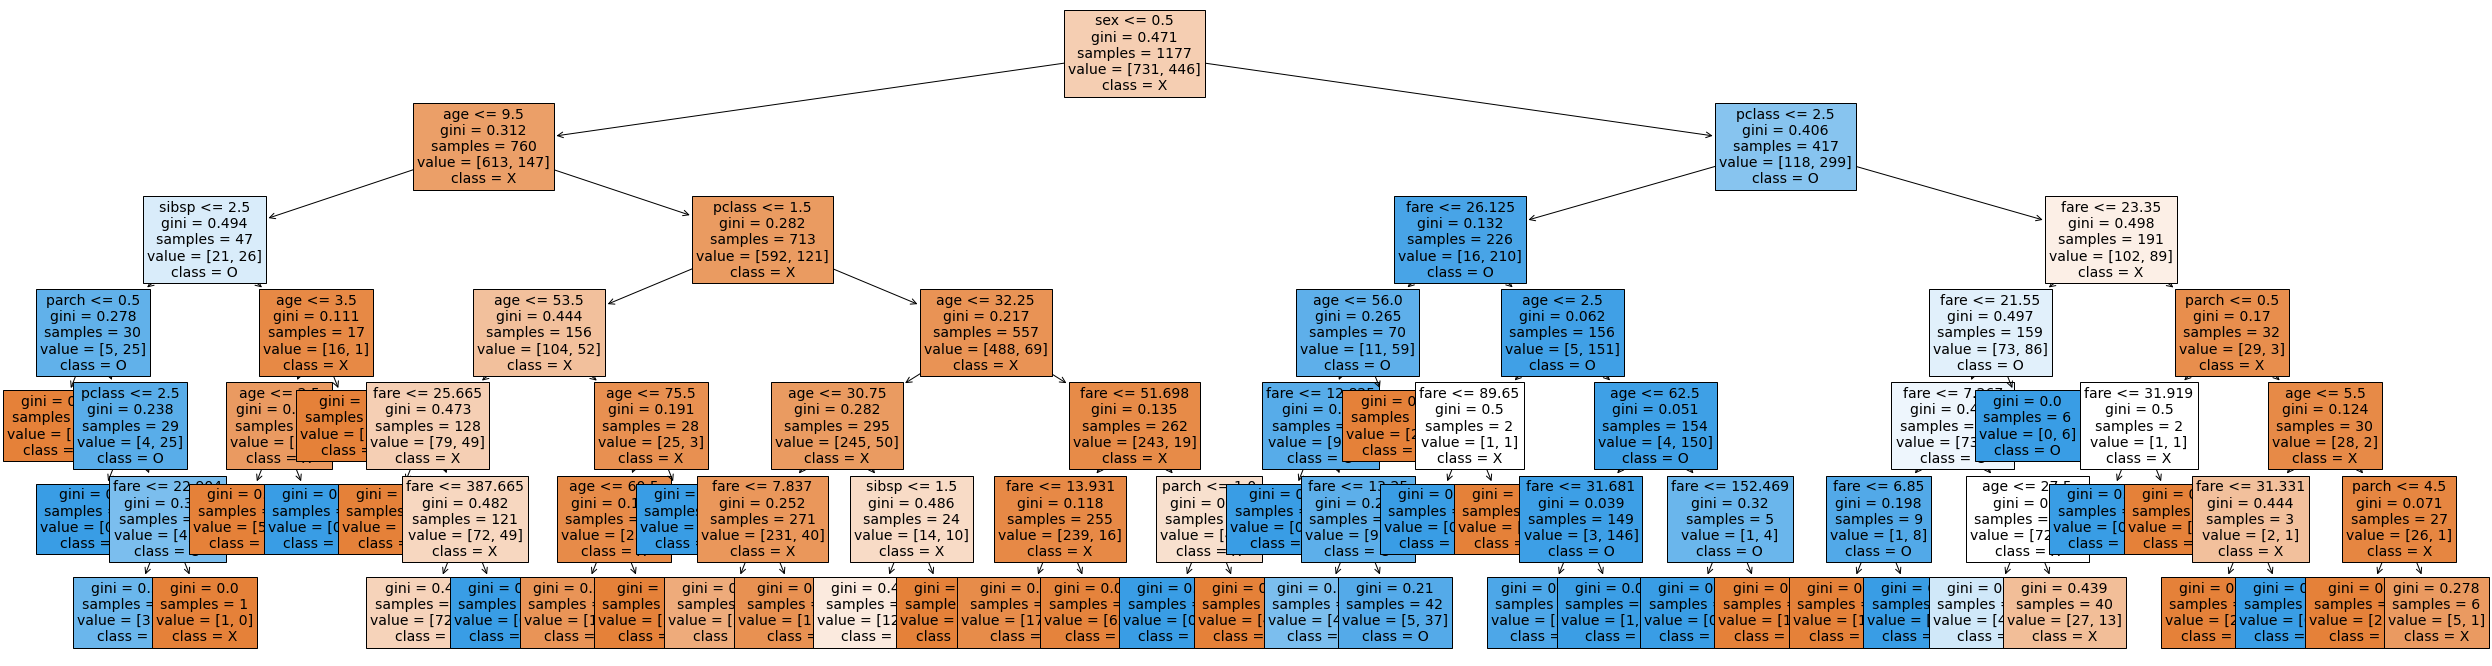

In [17]:
plt.figure(figsize=(44,12))
plot_tree(tree, feature_names = x_cols, class_names=['X', 'O'], filled=True, fontsize=14)
plt.savefig('tree1.png')
plt.show